# Hough transform test


In [1]:

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

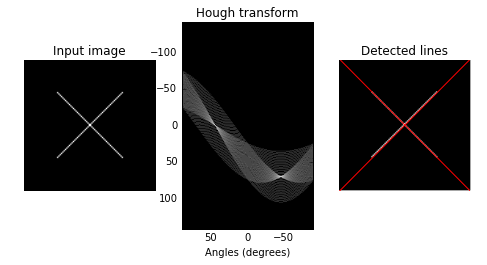

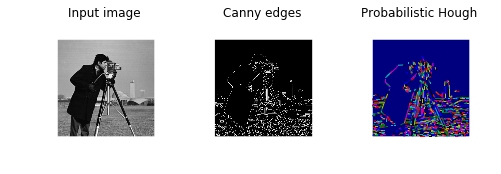

In [4]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import numpy as np
import matplotlib.pyplot as plt

# Construct test image

image = np.zeros((100, 100))


# Classic straight-line Hough transform

idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

h, theta, d = hough_line(image)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,4))

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()

ax2.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray, aspect=1/1.5)
ax2.set_title('Hough transform')
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.axis('image')

ax3.imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    ax3.plot((0, cols), (y0, y1), '-r')
ax3.axis((0, cols, rows, 0))
ax3.set_title('Detected lines')
ax3.set_axis_off()

# Line finding, using the Probabilistic Hough Transform

image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,4), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()
ax1.set_adjustable('box-forced')

ax2.imshow(edges, cmap=plt.cm.gray)
ax2.set_title('Canny edges')
ax2.set_axis_off()
ax2.set_adjustable('box-forced')

ax3.imshow(edges * 0)

for line in lines:
    p0, p1 = line
    ax3.plot((p0[0], p1[0]), (p0[1], p1[1]))

ax3.set_title('Probabilistic Hough')
ax3.set_axis_off()
ax3.set_adjustable('box-forced')
plt.show()


In [14]:

import matplotlib.image as mpimg
picture=mpimg.imread('lines.png')



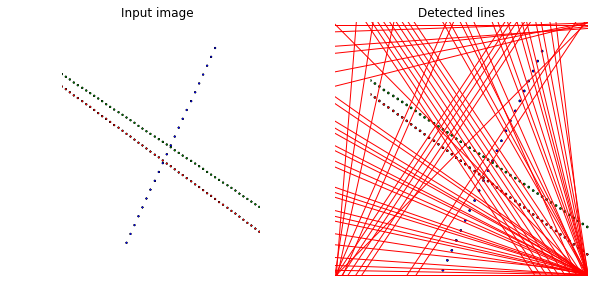

In [21]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,8))

#print(picture)

ax1.imshow(picture)
ax1.set_title('Input image')
ax1.set_axis_off()


h, theta, d = hough_line(image)


ax3.imshow(picture, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    ax3.plot((0, cols), (y0, y1), '-r')
ax3.axis((0, cols, rows, 0))
ax3.set_title('Detected lines')
ax3.set_axis_off()